# Project

### __Introduction__
Congratulations you've landed a data science job at Riot Games (https://en.wikipedia.org/wiki/Riot_Games) whether you know what they do or not.

Riot makes several games including the extremely popular online game League of Legends (https://en.wikipedia.org/wiki/League_of_Legends). You've been assigned to the League of Legends team to help analyze their data.

*From here on we will refer to League of Legends as just "League".

### __Background__

_In the game, two teams of five players battle in player-versus-player combat, each team occupying and defending their half of the map. Each of the ten players controls a character, known as a "champion", with unique abilities and differing styles of play. During a match, champions become more powerful by collecting experience points, earning gold, and purchasing items to defeat the opposing team. In League's main mode, Summoner's Rift, a team wins by pushing through to the enemy base and destroying their "Nexus", a large structure located within._ (wikipedia)

The two teams are the red team and the blue team.

In League there are different "tiers" of players called "leagues". New and unskilled players (sorry) are in __Bronze__ league while relatively skilled players are in __Diamond__ league.

*we will refer to a player in diamond league as a diamond player and a player in bronze league as a bronze player

### __Your job__
Investigate the differences between bronze players and diamond players. Presumably, bronze players and diamond players will play the game somewhat differently due to their relative skill difference. However, we dont expect there to be huge differences since bronze players may try to imitate diamond players in order to get better at the gane.

We want to know
1. Are there are any systematic differences in the way bronze players and diamond players approach the game?
2. Do bronze league games and diamond league games play out the same?

### __Data__
There are 8 provided datasets. Each row of each dataset records information from one match up to a certain point time (15, 20, 25, or 30 minutes)

For example
 - `timeline_DIAMOND_15.csv` contains match data up to 15 minutes into the game for diamond players.
 - `timeline_BRONZE_30.csv` contains match data up to 30 minutes into the game for bronze players.

We will be using all datasets to look at differences between bronze and diamond players over the course of the game.

### __Task__

Using the provided data we will compare the gameplay of bronze and diamond players at five stages of the game.
1. Stage 1 is the 15 minute mark
2. Stage 2 is the 20 minute mark
2. Stage 3 is the 25 minute mark
2. Stage 4 is the 30 minute mark

We will try to discover how features differ between the two groups and which features are important to predicting the winner of the game.




In [ ]:
# standard imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# score classifiers

from sklearn.preprocessing import OneHotEncoder
def brier_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return np.mean(np.sum((probs - target_enc)**2, axis=1))

def log_score(targets, probs):
  enc = OneHotEncoder()
  target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()
  return -np.mean(np.sum(target_enc * np.log(probs + 1e-32), axis=1))

# Question 1 -- Exploratory Analysis

Lets assume we dont know anything about league. We have never played the game, never seen anyone play it, and maybe we haven't even heard of it. Thats okay, we can still analyze the data and try to learn something.


First things first, we want to do some exploratory analysis. This will help us identify consistent trends between bronze and diamond players and become familiar with the data.

In [ ]:
# as always change the drive to your drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive/STAT335/Final Project


## Part a [10 pts]

Through a little investigation you find out there are some key metrics people keep track of to tell whos currently winning. We will look at three of them here.

1. The amount of "xp" earned by each team.  A team with more "xp" is typically stronger than a team with less "xp". Basically more xp is better.
2. The amount of "gold" earned by each team. A team with more gold typically has better equipment than a team with less gold. Basically more gold is better.
3. The number of "wards" placed by each team. A team with more wards can react to the opposing team better. Basically more wards is better.


Using the data available up to 15 minutes in the game, compare the distribution of xp, gold, and wards for bronze and diamond players.

1. Create 9 subfigures in a 3x3 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_gold, red_gold, gold_diff, blue_xp, red_xp, xp_diff, blue_ward_placed, red_ward_placed, ward_placed_diff. These variables record the amount of gold, xp, and wards each team (red or blue) has and the difference.
3. In each subfigure plot two histograms: one for diamond players and one for bronze players. Make each histogram transparent (alpha = 0.5) since they will overlap. Label each histogram.
4. Comment on any similarities or differences between the two histograms (within each subfigure) and any differences you notice overall between diamond and bronze players. Make sure to answer: Do bronze or diamond players tend to have more xp, gold, and wards (for either team)? Is there any systematic difference between red and blue team (for either diamond or bronze)? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.



In [ ]:
#bronze15 contains bronze league match data up to 15 minutes into the game
bronze15 = pd.read_csv('timeline_BRONZE_15.csv', index_col = 0)

#diamond15 contains diamond league match data up to 15 minutes into the game
diamond15 = pd.read_csv('timeline_DIAMOND_15.csv', index_col = 0)

In [ ]:
# check column names (should be the same for both datasets)
print(bronze15.columns)
print(diamond15.columns)
if bronze15.columns.all()==diamond15.columns.all():
  print('\n Yes, they have the same column name')

Index(['duration', 'blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp',
       'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff',
       'blue_ward_destroyed', 'red_ward_destroyed', 'ward_destroyed_diff',
       'first_blood', 'blue_kills', 'red_kills', 'kill_diff', 'first_turret',
       'blue_turrets', 'red_turrets', 'turret_diff', 'first_inhibitor',
       'blue_inhibitors', 'red_inhibitors', 'inhibitor_diff', 'first_herald',
       'blue_heralds', 'red_heralds', 'herald_diff', 'first_baron',
       'blue_barons', 'red_barons', 'baron_diff', 'blue_air', 'red_air',
       'air_diff', 'blue_hextech', 'red_hextech', 'hextech_diff', 'blue_fire',
       'red_fire', 'fire_diff', 'blue_earth', 'red_earth', 'earth_diff',
       'blue_water', 'red_water', 'water_diff', 'air', 'hextech', 'fire',
       'earth', 'water', 'blue_win'],
      dtype='object')
Index(['duration', 'blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp',
       'xp_diff', 'blue_ward_placed',

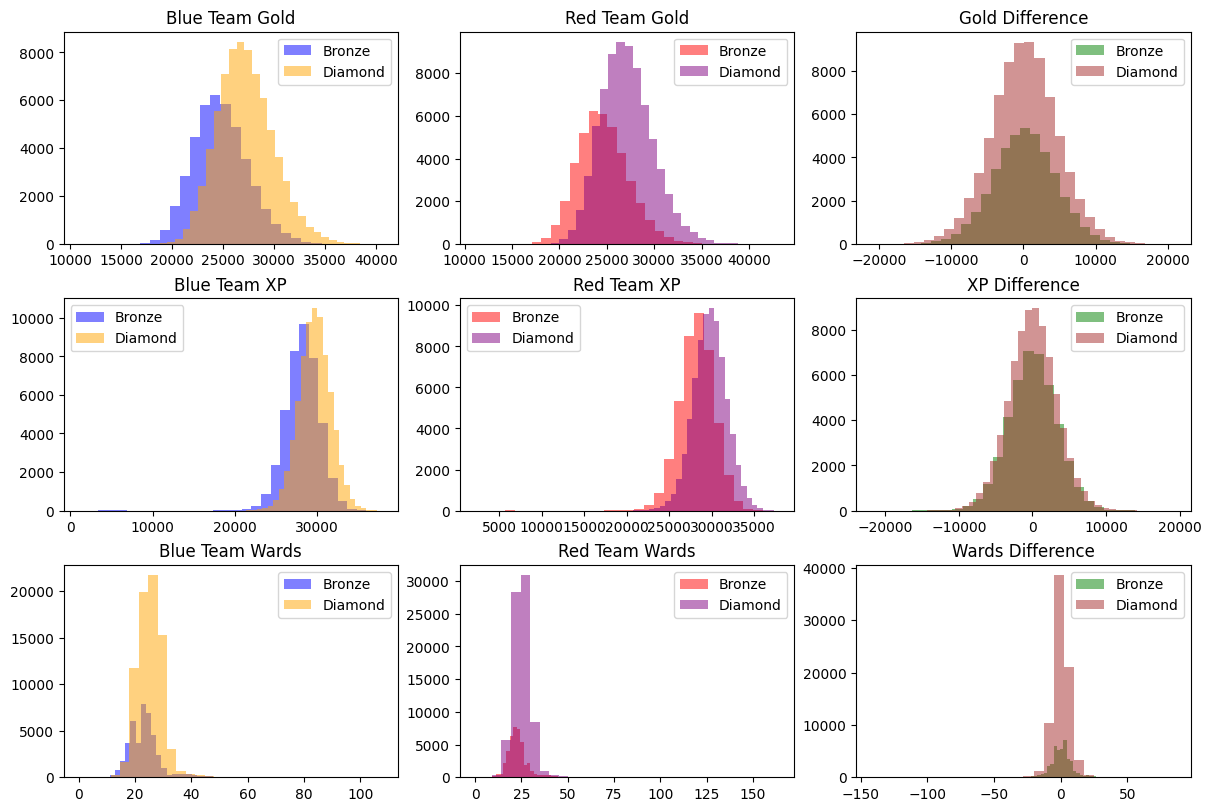

In [ ]:
fig, ax = plt.subplots(3, 3, constrained_layout = True, figsize = (12, 8))
columns = ['blue_gold', 'red_gold', 'gold_diff', 'blue_xp', 'red_xp', 'xp_diff', 'blue_ward_placed', 'red_ward_placed', 'ward_placed_diff']


# gold histograms
ax[0,0].hist(bronze15['blue_gold'], bins=30, alpha=0.5, label='Bronze', color='blue')
ax[0,0].hist(diamond15['blue_gold'], bins=30, alpha=0.5, label='Diamond', color='orange')
ax[0,0].legend()
ax[0, 0].set_title('Blue Team Gold')

ax[0,1].hist(bronze15['red_gold'], bins=30, alpha=0.5, label='Bronze', color='red')
ax[0,1].hist(diamond15['red_gold'], bins=30, alpha=0.5, label='Diamond', color='purple')
ax[0,1].legend()
ax[0, 1].set_title('Red Team Gold')

ax[0,2].hist(bronze15['gold_diff'], bins=30, alpha=0.5, label='Bronze', color='green')
ax[0,2].hist(diamond15['gold_diff'], bins=30, alpha=0.5, label='Diamond', color='brown')
ax[0,2].legend()
ax[0, 2].set_title('Gold Difference')

# XP histograms
ax[1,0].hist(bronze15['blue_xp'], bins=30, alpha=0.5, label='Bronze', color='blue')
ax[1,0].hist(diamond15['blue_xp'], bins=30, alpha=0.5, label='Diamond', color='orange')
ax[1,0].legend()
ax[1, 0].set_title('Blue Team XP')

ax[1,1].hist(bronze15['red_xp'], bins=30, alpha=0.5, label='Bronze', color='red')
ax[1,1].hist(diamond15['red_xp'], bins=30, alpha=0.5, label='Diamond', color='purple')
ax[1,1].legend()
ax[1, 1].set_title('Red Team XP')

ax[1,2].hist(bronze15['xp_diff'], bins=30, alpha=0.5, label='Bronze', color='green')
ax[1,2].hist(diamond15['xp_diff'], bins=30, alpha=0.5, label='Diamond', color='brown')
ax[1,2].legend()
ax[1, 2].set_title('XP Difference')


# Ward histograms
ax[2,0].hist(bronze15['blue_ward_placed'], bins=30, alpha=0.5, label='Bronze', color='blue')
ax[2,0].hist(diamond15['blue_ward_placed'], bins=30, alpha=0.5, label='Diamond', color='orange')
ax[2,0].legend()
ax[2, 0].set_title('Blue Team Wards')

ax[2,1].hist(bronze15['red_ward_placed'], bins=30, alpha=0.5, label='Bronze', color='red')
ax[2,1].hist(diamond15['red_ward_placed'], bins=30, alpha=0.5, label='Diamond', color='purple')
ax[2,1].legend()
ax[2, 1].set_title('Red Team Wards')

ax[2,2].hist(bronze15['ward_placed_diff'], bins=30, alpha=0.5, label='Bronze', color='green')
ax[2,2].hist(diamond15['ward_placed_diff'], bins=30, alpha=0.5, label='Diamond', color='brown')
ax[2,2].legend()
ax[2, 2].set_title('Wards Difference')

plt.show()

In [ ]:
from scipy.stats import ttest_ind

# Define the columns
columns_of_interest = ['blue_gold', 'red_gold', 'blue_xp', 'red_xp', 'blue_ward_placed', 'red_ward_placed']

for column in columns_of_interest:
    # do t test
    t_stat, p_value = ttest_ind(bronze15[column], diamond15[column])

    #results
    print(f"T-test results for {column}:")
    print(f"  - T-statistic: {t_stat}")
    print(f"  - P-value: {p_value}")
    print()

# calculate means and medians
for column in columns_of_interest:
    bronze_mean = bronze15[column].mean()
    diamond_mean = diamond15[column].mean()
    bronze_median = bronze15[column].median()
    diamond_median = diamond15[column].median()

    print(f"Means and Medians for {column}:")
    print(f"  - Bronze Mean: {bronze_mean}")
    print(f"  - Diamond Mean: {diamond_mean}")
    print(f"  - Bronze Median: {bronze_median}")
    print(f"  - Diamond Median: {diamond_median}")
    print()


T-test results for blue_gold:
  - T-statistic: -149.65419744730156
  - P-value: 0.0

T-test results for red_gold:
  - T-statistic: -149.5539703528421
  - P-value: 0.0

T-test results for blue_xp:
  - T-statistic: -123.2223994506914
  - P-value: 0.0

T-test results for red_xp:
  - T-statistic: -128.33209582389614
  - P-value: 0.0

T-test results for blue_ward_placed:
  - T-statistic: -69.98308905156689
  - P-value: 0.0

T-test results for red_ward_placed:
  - T-statistic: -75.47385098163069
  - P-value: 0.0

Means and Medians for blue_gold:
  - Bronze Mean: 24741.49777649576
  - Diamond Mean: 27233.557711515667
  - Bronze Median: 24589.0
  - Diamond Median: 27051.0

Means and Medians for red_gold:
  - Bronze Mean: 24619.929064205186
  - Diamond Mean: 27106.277777037914
  - Bronze Median: 24446.0
  - Diamond Median: 26931.0

Means and Medians for blue_xp:
  - Bronze Mean: 28264.027210884353
  - Diamond Mean: 29783.161781352796
  - Bronze Median: 28329.0
  - Diamond Median: 29791.0

Means

**In gold, XP, and wards, diamond players consistently outperform bronze players, both in terms of mean and median.
The difference between red and blue teams is consistent across both bronze and diamond players, with diamond players having higher averages in both teams. The results from the various t-test further support the observed differences between bronze and diamond players.**

## Part b  [10 pts]

We suspect that the amount of gold earned may be the most important variable.
Lets compare the gold distribution across match lengths for bronze and diamond players.

In [ ]:
diamond15 = pd.read_csv('timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('timeline_DIAMOND_30.csv', index_col = 0)

bronze15 = pd.read_csv('timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('timeline_BRONZE_30.csv', index_col = 0)

Using the data available up to 15, 20, 25 and 30 minutes into the game, compare the distribution of gold for bronze and diamond players.

1. Create 12 subfigures in a 4x3 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_gold, red_gold, gold_diff
3. In each subfigure plot two histograms: one for diamond players and one for bronze players. Make each histogram transparent (alpha = 0.5) since they will overlap. Label the histograms.
5. Create table that clearly displays the mean of each histogram for each of the twelve subfigures. The table should be 12x3, each row is a subfigure, column 1 contains the title of the subfigure, column 2 contains the bronze mean, and column 3 contains the diamond mean.
4. Comment on any similarities or differences between the two histograms (within each subfigure) and any differences you notice overall between diamond and bronze players.  Make sure to answer: Do bronze or diamond players tend to have more gold (for either team)? Does the gap between bronze and diamond grow with match length? Is there any systematic difference between red and blue team (for either diamond or bronze)? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.



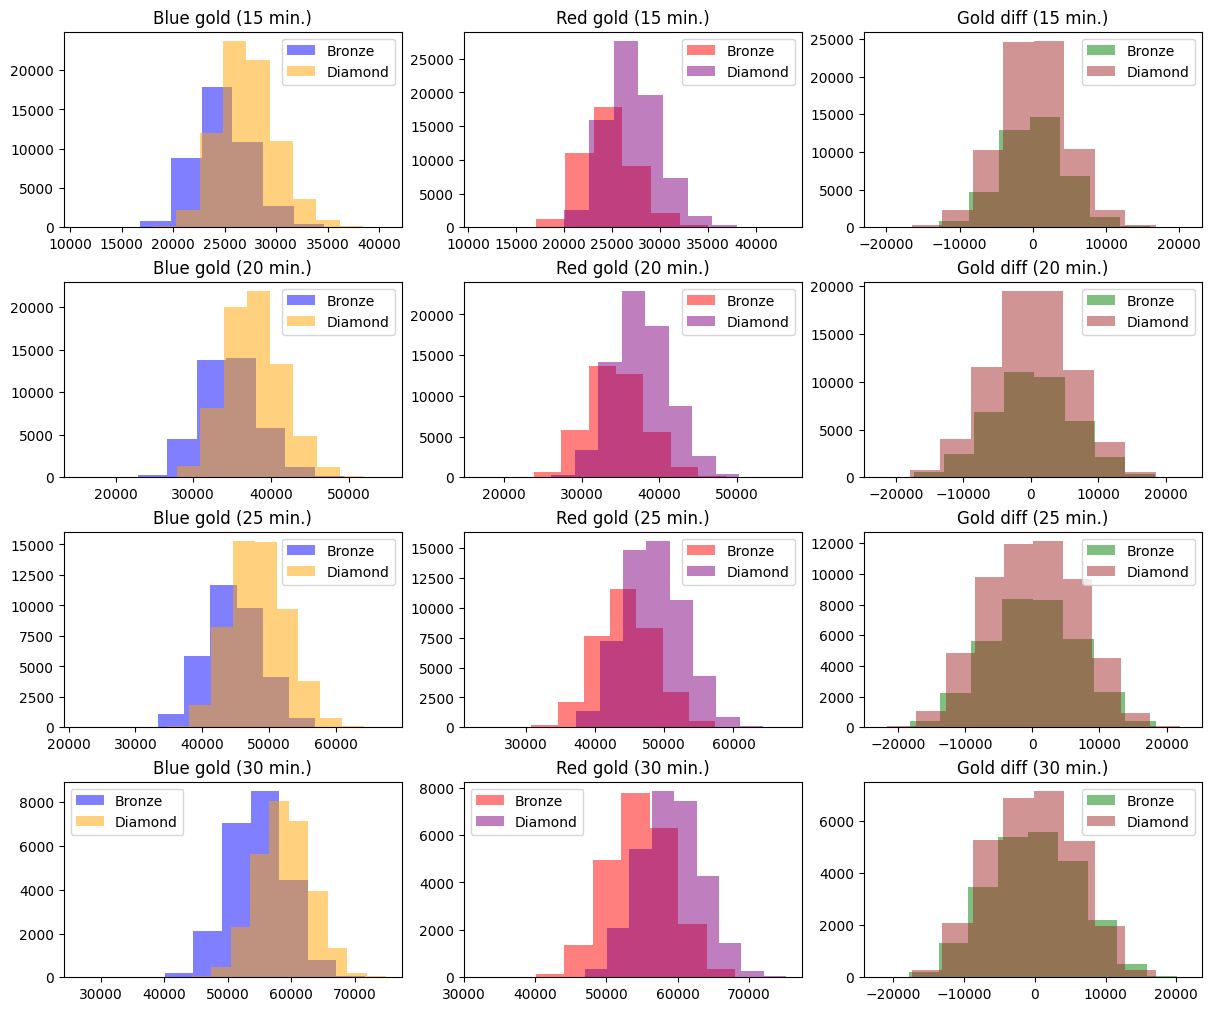

In [ ]:
import matplotlib.pyplot as plt

# histogram plotting function
def plot_gold_histogram(ax, diamond_data, bronze_data, title, row):
    # Plot histograms
    ax[row, 0].hist(bronze_data['blue_gold'], alpha=0.5, label='Bronze', color='blue')
    ax[row, 0].hist(diamond_data['blue_gold'], alpha=0.5, label='Diamond', color='orange')
    ax[row, 0].legend()
    ax[row, 0].set_title(f'Blue gold ({title})')

    ax[row, 1].hist(bronze_data['red_gold'], alpha=0.5, label='Bronze', color='red')
    ax[row, 1].hist(diamond_data['red_gold'], alpha=0.5, label='Diamond', color='purple')
    ax[row, 1].legend()
    ax[row, 1].set_title(f'Red gold ({title})')

    ax[row, 2].hist(bronze_data['gold_diff'], alpha=0.5, label='Bronze', color='green')
    ax[row, 2].hist(diamond_data['gold_diff'], alpha=0.5, label='Diamond', color='brown')
    ax[row, 2].legend()
    ax[row, 2].set_title(f'Gold diff ({title})')

# subplot
fig, ax = plt.subplots(4, 3, constrained_layout=True, figsize=(12, 10))

plot_gold_histogram(ax, diamond15, bronze15, '15 min.', 0)
plot_gold_histogram(ax, diamond20, bronze20, '20 min.', 1)
plot_gold_histogram(ax, diamond25, bronze25, '25 min.', 2)
plot_gold_histogram(ax, diamond30, bronze30, '30 min.', 3)

plt.show()

In [ ]:
# create table
import pandas as pd

# find means
data = {
    'Title': ['Blue gold (15 min.)', 'Red gold (15 min.)', 'Gold diff (15 min.)',
              'Blue gold (20 min.)', 'Red gold (20 min.)', 'Gold diff (20 min.)',
              'Blue gold (25 min.)', 'Red gold (25 min.)', 'Gold diff (25 min.)',
              'Blue gold (30 min.)', 'Red gold (30 min.)', 'Gold diff (30 min.)'],
    'Bronze Mean': [bronze15['blue_gold'].mean(), bronze15['red_gold'].mean(), bronze15['gold_diff'].mean(),
                    bronze20['blue_gold'].mean(), bronze20['red_gold'].mean(), bronze20['gold_diff'].mean(),
                    bronze25['blue_gold'].mean(), bronze25['red_gold'].mean(), bronze25['gold_diff'].mean(),
                    bronze30['blue_gold'].mean(), bronze30['red_gold'].mean(), bronze30['gold_diff'].mean()],
    'Diamond Mean': [diamond15['blue_gold'].mean(), diamond15['red_gold'].mean(), diamond15['gold_diff'].mean(),
                     diamond20['blue_gold'].mean(), diamond20['red_gold'].mean(), diamond20['gold_diff'].mean(),
                     diamond25['blue_gold'].mean(), diamond25['red_gold'].mean(), diamond25['gold_diff'].mean(),
                     diamond30['blue_gold'].mean(), diamond30['red_gold'].mean(), diamond30['gold_diff'].mean()]
}

# make and print  DataFrame
df = pd.DataFrame(data)

print(df)


                  Title   Bronze Mean  Diamond Mean
0   Blue gold (15 min.)  24741.497776  27233.557712
1    Red gold (15 min.)  24619.929064  27106.277777
2   Gold diff (15 min.)    121.568712    127.279934
3   Blue gold (20 min.)  34690.530151  37820.458150
4    Red gold (20 min.)  34509.430812  37697.718769
5   Gold diff (20 min.)    181.099339    122.739381
6   Blue gold (25 min.)  44605.701921  48392.694304
7    Red gold (25 min.)  44481.136954  48380.779924
8   Gold diff (25 min.)    124.564967     11.914380
9   Blue gold (30 min.)  54729.310733  58955.282586
10   Red gold (30 min.)  54755.995345  59113.174376
11  Gold diff (30 min.)    -26.684612   -157.891789


**At each time interval (15, 20, 25, and 30 minutes), diamond players consistently have higher mean gold values compared to bronze players for both blue and red teams.
So on average, diamond players tend to accumulate more gold than bronze players regardless of the team color. The gold difference between bronze and diamond players appears to increase as the match progresses. In both bronze and diamond categories, there isn't a consistent pattern favoring either the blue or red team across all time intervals.The gold differences between blue and red teams vary at each time interval. Looking at the table, at 15 minutes, the gold difference is 121.57 in favor of blue for bronze, but at 25 minutes, it's only 11.91 in favor of blue for diamond.**

## Part c  [10 pts]

Maybe looking at winners and losers aggregated together isnt the best idea. Lets see how gold differences vary between winners and losers (over time and between bronze and diamond). Perhaps the gold accumulation and the gold lead (gold diff) is different for bronze and diamond players?

1. Create 8 subfigures in a 2x4 grid (done for you). Fill in the provided template with the appropriate variables.
2. The column names (variables) you will need are: blue_win, blue_gold, and gold_diff
3. In each subfigure plot two histograms: one for diamond players and one for bronze players only in the cases where blue team won (`blue_win == 1`). Make each histogram transparent (alpha = 0.5) since they will overlap. Label the histograms.
5. Create table that clearly displays the mean of each histogram for each of the eight subfigures. The table should be 8x3, each row is a subfigure, column 1 contains the title of the subfigure, column 2 contains the bronze mean, and column 3 contains the diamond mean.
4. Comment on any similarities or differences you notice overall between diamond and bronze players or over time. Make sure to answer: Does the gold advantage (average value of gold_diff) grow over time? Is there a difference between bronze and diamond players? I.e are diamond players typically "more ahead"? Use summary measures like the mean or median to quantify your response. Briefly argue these points, a simple "yes" or "no" is insufficient.


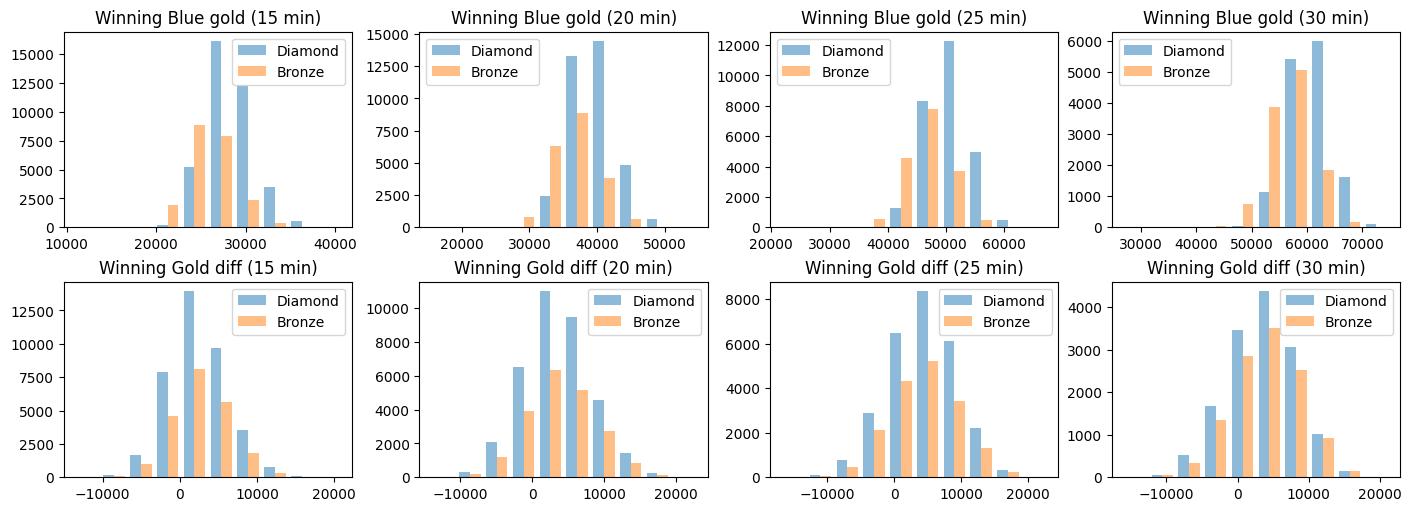

In [ ]:
import matplotlib.pyplot as plt

# filter data where blue team won
diamond15_blue_win = diamond15[diamond15['blue_win'] == 1]
diamond20_blue_win = diamond20[diamond20['blue_win'] == 1]
diamond25_blue_win = diamond25[diamond25['blue_win'] == 1]
diamond30_blue_win = diamond30[diamond30['blue_win'] == 1]

bronze15_blue_win = bronze15[bronze15['blue_win'] == 1]
bronze20_blue_win = bronze20[bronze20['blue_win'] == 1]
bronze25_blue_win = bronze25[bronze25['blue_win'] == 1]
bronze30_blue_win = bronze30[bronze30['blue_win'] == 1]

fig, ax = plt.subplots(2, 4, constrained_layout = True, figsize = (14, 5))

# blue gold
ax[0,0].hist([diamond15_blue_win['blue_gold'], bronze15_blue_win['blue_gold']], alpha=0.5, label=['Diamond', 'Bronze'])
ax[0,1].hist([diamond20_blue_win['blue_gold'], bronze20_blue_win['blue_gold']], alpha=0.5, label=['Diamond', 'Bronze'])
ax[0,2].hist([diamond25_blue_win['blue_gold'], bronze25_blue_win['blue_gold']], alpha=0.5, label=['Diamond', 'Bronze'])
ax[0,3].hist([diamond30_blue_win['blue_gold'], bronze30_blue_win['blue_gold']], alpha=0.5, label=['Diamond', 'Bronze'])

# gold diff
ax[1,0].hist([diamond15_blue_win['gold_diff'], bronze15_blue_win['gold_diff']], alpha=0.5, label=['Diamond', 'Bronze'])
ax[1,1].hist([diamond20_blue_win['gold_diff'], bronze20_blue_win['gold_diff']], alpha=0.5, label=['Diamond', 'Bronze'])
ax[1,2].hist([diamond25_blue_win['gold_diff'], bronze25_blue_win['gold_diff']], alpha=0.5, label=['Diamond', 'Bronze'])
ax[1,3].hist([diamond30_blue_win['gold_diff'], bronze30_blue_win['gold_diff']], alpha=0.5, label=['Diamond', 'Bronze'])

# titles
ax[0,0].set_title('Winning Blue gold (15 min)')
ax[0,1].set_title('Winning Blue gold (20 min)')
ax[0,2].set_title('Winning Blue gold (25 min)')
ax[0,3].set_title('Winning Blue gold (30 min)')
ax[1,0].set_title('Winning Gold diff (15 min)')
ax[1,1].set_title('Winning Gold diff (20 min)')
ax[1,2].set_title('Winning Gold diff (25 min)')
ax[1,3].set_title('Winning Gold diff (30 min)')

for i in range(4):
    ax[0,i].legend()
    ax[1,i].legend()

plt.show()


In [ ]:
# create table
import pandas as pd

# Calculate means
data = {
    'Title': ['Winning Blue gold (15 min)', 'Winning Blue gold (20 min)', 'Winning Blue gold (25 min)', 'Winning Blue gold (30 min)',
              'Winning Gold diff (15 min)', 'Winning Gold diff (20 min)', 'Winning Gold diff (25 min)', 'Winning Gold diff (30 min)'],
    'Bronze Mean': [bronze15_blue_win['blue_gold'].mean(), bronze20_blue_win['blue_gold'].mean(), bronze25_blue_win['blue_gold'].mean(), bronze30_blue_win['blue_gold'].mean(),
                    bronze15_blue_win['gold_diff'].mean(), bronze20_blue_win['gold_diff'].mean(), bronze25_blue_win['gold_diff'].mean(), bronze30_blue_win['gold_diff'].mean()],
    'Diamond Mean': [diamond15_blue_win['blue_gold'].mean(), diamond20_blue_win['blue_gold'].mean(), diamond25_blue_win['blue_gold'].mean(), diamond30_blue_win['blue_gold'].mean(),
                     diamond15_blue_win['gold_diff'].mean(), diamond20_blue_win['gold_diff'].mean(), diamond25_blue_win['gold_diff'].mean(), diamond30_blue_win['gold_diff'].mean()]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)


                        Title   Bronze Mean  Diamond Mean
0  Winning Blue gold (15 min)  25893.674664  28483.645345
1  Winning Blue gold (20 min)  36465.827672  39664.889615
2  Winning Blue gold (25 min)  46604.352378  50621.178989
3  Winning Blue gold (30 min)  56632.105779  60831.249738
4  Winning Gold diff (15 min)   2455.904031   2621.463895
5  Winning Gold diff (20 min)   3776.496691   3807.514916
6  Winning Gold diff (25 min)   4197.648497   4506.325021
7  Winning Gold diff (30 min)   3830.244715   3659.378732



**As seen before, both Diamond and Bronze players tend to accumulate more gold as the match progresses, which is evident from the increasing mean values from 15 minutes to 30 minutes for both types of players. he gold advantage, as measured by the average value of ‘gold_diff’, does not consistently grow over time. While there is an increase from 15 minutes to 25 minutes, the gold advantage actually decreases at the 30-minute mark for both Diamond and Bronze players. Diamond players are typically more ahead in terms of gold accumulation. This is evident from the higher mean values of ‘blue_gold’ for Diamond players compared to Bronze players at all times.**


## Part d  [10 pts]

There is a persistent belief that the blue team has an advantage, i.e. blue team wins more often than red team.

For each stage of the game (15, 20, 25, 30 minutes) and for both diamond and bronze players compute the win percentage of the blue team (fraction of times that blue_win == 1).

1. Plot two lines (label them) indicating the percent of the time blue wins. X-axis is match time (15, 20, 25, 30 minutes) and y-axis is win percentage of blue team.
2. One line shows the win percentage of blue for diamond players
3. The other line shows the win percentage of blue for bronze players
4. Label the axis and title the plot appropriately.
5. Comment on if there are any systematic similarities and differences between the two curves. Make sure to answer: Does blue team have an advantage (higher than 50% win percentage)? Is there a difference between diamond and bronze? Does the chance blue wins change over time? Briefly argue these points, a simple "yes" or "no" is insufficient.

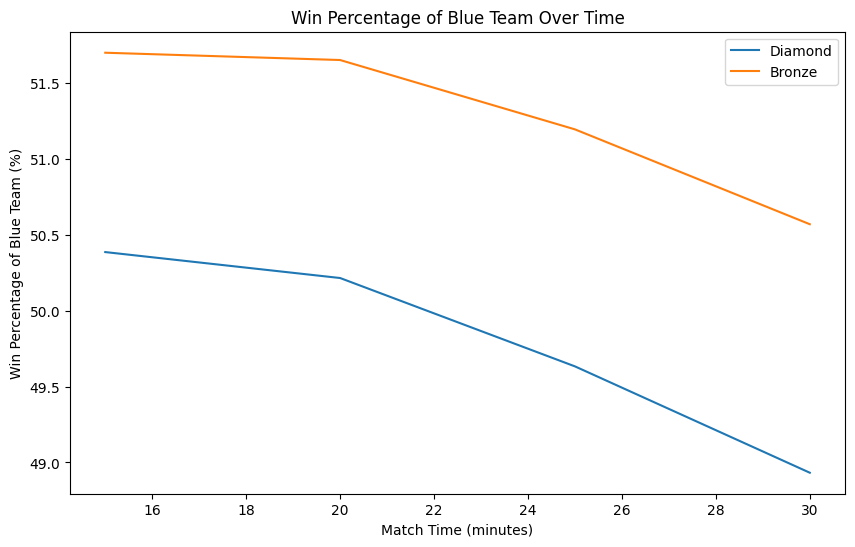

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# win percentages
diamond_win_percentages = [diamond15['blue_win'].mean(), diamond20['blue_win'].mean(), diamond25['blue_win'].mean(), diamond30['blue_win'].mean()]
bronze_win_percentages = [bronze15['blue_win'].mean(), bronze20['blue_win'].mean(), bronze25['blue_win'].mean(), bronze30['blue_win'].mean()]

# convert to numpy arrays and multiply by 100 to get percentages
diamond_win_percentages = np.array(diamond_win_percentages) * 100
bronze_win_percentages = np.array(bronze_win_percentages) * 100

match_times = [15, 20, 25, 30]

# plot procedures
plt.figure(figsize=(10, 6))
plt.plot(match_times, diamond_win_percentages, label='Diamond')
plt.plot(match_times, bronze_win_percentages, label='Bronze')
plt.xlabel('Match Time (minutes)')
plt.ylabel('Win Percentage of Blue Team (%)')
plt.title('Win Percentage of Blue Team Over Time')
plt.legend()
plt.show()



In [ ]:
import pandas as pd

# make a dataframe with the percent wins at key match times
data = {
    'Match Time (minutes)': [15, 20, 25, 30],
    'Bronze Win Percentage (%)': [bronze15['blue_win'].mean() * 100, bronze20['blue_win'].mean() * 100, bronze25['blue_win'].mean() * 100, bronze30['blue_win'].mean() * 100],
    'Diamond Win Percentage (%)': [diamond15['blue_win'].mean() * 100, diamond20['blue_win'].mean() * 100, diamond25['blue_win'].mean() * 100, diamond30['blue_win'].mean() * 100]
}

df = pd.DataFrame(data)
print(df)


   Match Time (minutes)  Bronze Win Percentage (%)  Diamond Win Percentage (%)
0                    15                  51.698276                   50.385542
1                    20                  51.650202                   50.214707
2                    25                  51.193571                   49.632874
3                    30                  50.568966                   48.932603


**The win percentage of the blue team is slightly higher than 50% for both Diamond and Bronze players at 15 and 20 minute marks. This suggests that the blue team might have a slight advantage in the beginning of the game. The win percentage of the blue team is slightly higher for Bronze players compared to Diamond players at all times. The win percentage of the blue team decreases over time for both Diamond and Bronze players. This could mean that the initial advantage of the blue team decreases as the game progresses. AT the 30-minute mark, the win percentage of the blue team drops below 50% for Diamond players, suggesting that the red team might have a slight advantage towards the end of the game.**

# Question 2 -- Predicting Winners

Now we want to further investigate how bronze and diamond players differ. Since bronze and diamond players have different skill levels, we think their games might be played differently. For example, maybe "xp" and gold are more important to bronze players and "wards" are more important for diamond players.

Lets build some models to predict the winner of a match using the provided match information. We will investigate a few different phenomena

1. Is it easier to predict the outcome of bronze or diamond league matches?
2. Do different features determine the winner between bronze and diamond league players?

In [ ]:
# as always change the drive to your drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/STAT335/Final Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/STAT335/Final Project


## Part a  [10 pts]

Lets start with the diamond players. We want to classify if blue team will win (`blue_win == 1`), given match information like xp, gold, wards, etc., at the 15, 20, 25, and 30 minute marks. I.e. we need 4 classification models.


1. Import the diamond player data (done for you)
2. Separate the target variable (blue_win) and the feature matrix (everything else) (done for 15 minutes data, you do the rest).
3. Fit __any__ classification model you like to each dataset.
 - Make sure your model has an out of sample `brier < 0.4` and an `accuracy > 0.65` on the 15 minute data. We dont want to use bad models!
 - You need a variable importance measure, so maybe dont choose nearest neighbors.
 - For logistic regression use the absolute value of the coefficients as variable importance.
 - For decision trees or random forest use the feature_importance_ score.
 - Make sure to fit the same model type at each time time point so that youre results are comparable. I.e. use all logistic regression or all random forests etc. Do not mix and match.

In [ ]:
diamond15 = pd.read_csv('timeline_DIAMOND_15.csv', index_col = 0)
diamond20 = pd.read_csv('timeline_DIAMOND_20.csv', index_col = 0)
diamond25 = pd.read_csv('timeline_DIAMOND_25.csv', index_col = 0)
diamond30 = pd.read_csv('timeline_DIAMOND_30.csv', index_col = 0)

bronze15 = pd.read_csv('timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('timeline_BRONZE_30.csv', index_col = 0)


In [ ]:
# 15 minutes
x15 = diamond15.drop(['blue_win'], axis=1)
y15 = diamond15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)

# Fit the model
model15 = LogisticRegression()
model15.fit(x15_train, y15_train.ravel())

# 20 minutes
x20 = diamond20.drop(['blue_win'], axis=1)
y20 = diamond20.loc[:,['blue_win']]

x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)

x20_train = np.array(x20_train)
y20_train = np.array(y20_train)
x20_test = np.array(x20_test)
y20_test = np.array(y20_test)

# Fit the model
model20 = LogisticRegression()
model20.fit(x20_train, y20_train.ravel())

# 25 minutes
x25 = diamond25.drop(['blue_win'], axis=1)
y25 = diamond25.loc[:,['blue_win']]

x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)

x25_train = np.array(x25_train)
y25_train = np.array(y25_train)
x25_test = np.array(x25_test)
y25_test = np.array(y25_test)

# Fit the model
model25 = LogisticRegression()
model25.fit(x25_train, y25_train.ravel())

# 30 minutes
x30 = diamond30.drop(['blue_win'], axis=1)
y30 = diamond30.loc[:,['blue_win']]

x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)

x30_train = np.array(x30_train)
y30_train = np.array(y30_train)
x30_test = np.array(x30_test)
y30_test = np.array(y30_test)

# Fit the model
model30 = LogisticRegression()
model30.fit(x30_train, y30_train.ravel())



LogisticRegression()

## Part b  [10 pts]

Compute the brier score and accuracy of each model (4 models in total) on the test set.

1. Compute and print the brier score and accruacy of each model (round to 3 decimal places)
2. Display the brier score and accuracy in a single table. The table should be 4x3. Each row is a time point (15, 20, 25, or 30 minutes). Column 1 is the time point as a string, column 2 is the brier score, column 3 is the accuracy. For example row 1 might look like `15 Minutes, 0.351, 0.825`.
2. We might naively expect that its easier to predict the winner the longer the match goes on. Comment on: Which time period is the hardest to predict? Which time period is the easiest to predict? Do matches become more predictable (better scores) over time? Use the computed Brier and accuracy scores to inform your response.

In [ ]:
from sklearn.metrics import accuracy_score
# Predict probabilities, brier score, and accuracy for all models
#15 minute model
probs15 = model15.predict_proba(x15_test)
brier15 = brier_score(y15_test, probs15)
accuracy15 = accuracy_score(y15_test, model15.predict(x15_test))

# 20 minute model
probs20 = model20.predict_proba(x20_test)
brier20 = brier_score(y20_test, probs20)
accuracy20 = accuracy_score(y20_test, model20.predict(x20_test))

#  25 minute model
probs25 = model25.predict_proba(x25_test)
brier25 = brier_score(y25_test, probs25)
accuracy25 = accuracy_score(y25_test, model25.predict(x25_test))

# 30 minute model
probs30 = model30.predict_proba(x30_test)
brier30 = brier_score(y30_test, probs30)
accuracy30 = accuracy_score(y30_test, model30.predict(x30_test))

# print
print(f"15 minute model: Brier score = {brier15:.3f}, Accuracy = {accuracy15:.3f}")
print(f"20 minute model: Brier score = {brier20:.3f}, Accuracy = {accuracy20:.3f}")
print(f"25 minute model: Brier score = {brier25:.3f}, Accuracy = {accuracy25:.3f}")
print(f"30 minute model: Brier score = {brier30:.3f}, Accuracy = {accuracy30:.3f}")



15 minute model: Brier score = 0.332, Accuracy = 0.753
20 minute model: Brier score = 0.284, Accuracy = 0.792
25 minute model: Brier score = 0.258, Accuracy = 0.816
30 minute model: Brier score = 0.289, Accuracy = 0.792


In [ ]:
import pandas as pd

# Make a table
brier15_rounded = round(brier15, 3)
accuracy15_rounded = round(accuracy15, 3)

brier20_rounded = round(brier20, 3)
accuracy20_rounded = round(accuracy20, 3)

brier25_rounded = round(brier25, 3)
accuracy25_rounded = round(accuracy25, 3)

brier30_rounded = round(brier30, 3)
accuracy30_rounded = round(accuracy30, 3)


data = {
    'Model': ['15 minutes', '20 minutes', '25 minutes', '30 minutes'],
    'Brier Score': [brier15_rounded, brier20_rounded, brier25_rounded, brier30_rounded],
    'Accuracy': [accuracy15_rounded, accuracy20_rounded, accuracy25_rounded, accuracy30_rounded]
}

df = pd.DataFrame(data)

print(df)


        Model  Brier Score  Accuracy
0  15 minutes        0.332     0.753
1  20 minutes        0.284     0.792
2  25 minutes        0.258     0.816
3  30 minutes        0.289     0.792


**Since 15 minute time point has the highest brier score and the lowest accuracy it is the hardest to predict. Since 25 minutes is the lowest brier score and the highest accuracy it is the easiest to predict. Matches do not become more predictable over time. As for whether matches become more predictable over time there is no consistent trend within the brier score and accuracy.
Overall, there is an increase in predictability from 15 to 25 minutes, this stops at 30 minutes, where both Brier Score and Accuracy increase. Most likely matches may become more predictable up to 25 minutes and after that, the predictability might decline.**

## Part c  [10 pts]

Now plot the ROC curve for each model in a single figure. Make sure each line is appropriately labeled.

1. Create a single ROC curve plot
2. Compute and print the AUC values for each model.
3. Based on the AUC values, comment on: Which time period is the hardest to predict? Does that make sense? Which time period is the easiest to predict? Does that make sense? Do matches become more predictable (better scores) over time? Use the computed Brier and accuracy scores to inform your response. Do these results corroborate your findings in part b? Briefly argue these points, a simple "yes" or "no" is insufficient.

15 minute model: AUC = 0.834
20 minute model: AUC = 0.878
25 minute model: AUC = 0.899
30 minute model: AUC = 0.874


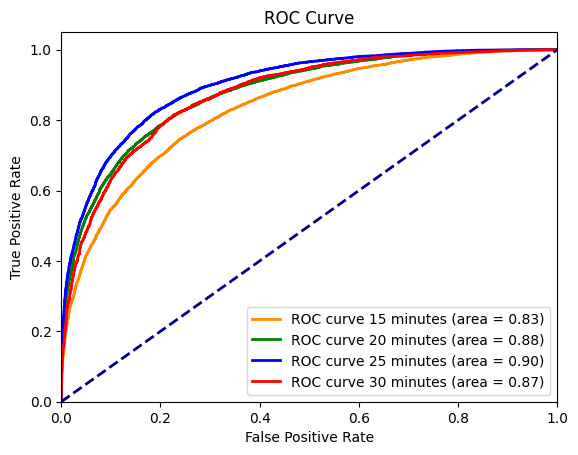

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# find ROC curve
fpr15, tpr15, _ = roc_curve(y15_test, probs15[:, 1])
fpr20, tpr20, _ = roc_curve(y20_test, probs20[:, 1])
fpr25, tpr25, _ = roc_curve(y25_test, probs25[:, 1])
fpr30, tpr30, _ = roc_curve(y30_test, probs30[:, 1])

# print auc
roc_auc15 = auc(fpr15, tpr15)
roc_auc20 = auc(fpr20, tpr20)
roc_auc25 = auc(fpr25, tpr25)
roc_auc30 = auc(fpr30, tpr30)
print(f"15 minute model: AUC = {roc_auc15:.3f}")
print(f"20 minute model: AUC = {roc_auc20:.3f}")
print(f"25 minute model: AUC = {roc_auc25:.3f}")
print(f"30 minute model: AUC = {roc_auc30:.3f}")


# Plot ROC curve
plt.figure()
plt.plot(fpr15, tpr15, color='darkorange', lw=2, label='ROC curve 15 minutes (area = %0.2f)' % roc_auc15)
plt.plot(fpr20, tpr20, color='green', lw=2, label='ROC curve 20 minutes (area = %0.2f)' % roc_auc20)
plt.plot(fpr25, tpr25, color='blue', lw=2, label='ROC curve 25 minutes (area = %0.2f)' % roc_auc25)
plt.plot(fpr30, tpr30, color='red', lw=2, label='ROC curve 30 minutes (area = %0.2f)' % roc_auc30)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Based on AUC, the 25 minute model is the hardest to predict since the auc score is the highest at .899. Therefore, based on AUC, both the 15-minute and 30-minute time periods might be considered relatively easier to predict. The AUC values show an increase from 15 minutes (0.834) to 20 minutes (0.878) and a further increase at 25 minutes (0.899) before a slight decrease at 30 minutes (0.874). This suggests an improvement in predictive performance up to 25 minutes, with a slight decrease at 30 minutes. Since 15 minute time point has the highest brier score and the lowest accuracy it is the hardest to predict. Since 25 minutes is the lowest brier score and the highest accuracy it is the easiest to predict. So the information from the brier/accuracy is opposite from the roc/auc information.

## Part d  [10 pts]

Now we want to know which features are important for predicting the winner.


1. Print the feature importance of each feature in a table format. Each row should include the feature name and the importance score for each model. Sort this table by the feature importances for the 15 minute mark model.
2. If you used logistic regression use the coefficients (coefs_) as the importance measure
3. If you used decision trees or random forests use the feature importance score (feature_importances_) as the importance measure
4. Comment on: What are the top 5 most important features for predicting the winner of the game at the 15, 20, 25, and 30 minute marks of the match. Are these variables the same? Do any features become more or less important over time? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [ ]:

def get_feature_importance(model, features):
    coefficients = model.coef_[0]
    abs_coefficients = np.abs(coefficients)
    return pd.DataFrame({'Feature': features, 'Absolute Coefficient': abs_coefficients})

feature_importance_15 = get_feature_importance(model15, x15.columns)
feature_importance_20 = get_feature_importance(model20, x20.columns)
feature_importance_25 = get_feature_importance(model25, x25.columns)
feature_importance_30 = get_feature_importance(model30, x30.columns)


feature_importance_table = pd.merge(feature_importance_15, feature_importance_20, on='Feature', suffixes=('_15', '_20'))
feature_importance_table = pd.merge(feature_importance_table, feature_importance_25, on='Feature')
feature_importance_table = pd.merge(feature_importance_table, feature_importance_30, on='Feature', suffixes=('_25', '_30'))

# Sort the table by feature importances for the 15-minute mark model
feature_importance_table = feature_importance_table.sort_values(by='Absolute Coefficient_15', ascending=False)
print(feature_importance_table)


                Feature  Absolute Coefficient_15  Absolute Coefficient_20  \
3             gold_diff             2.237096e-04             1.671345e-04   
1             blue_gold             1.182657e-04             8.522986e-05   
2              red_gold             1.054439e-04             8.190461e-05   
6               xp_diff             5.679457e-05             9.143699e-05   
5                red_xp             3.158309e-05             4.607595e-05   
4               blue_xp             2.521148e-05             4.536104e-05   
9      ward_placed_diff             5.137617e-07             5.120878e-07   
16            kill_diff             3.252880e-07             2.366552e-07   
8       red_ward_placed             2.970453e-07             3.019657e-07   
7      blue_ward_placed             2.167164e-07             2.101220e-07   
14           blue_kills             1.757873e-07             1.091260e-07   
15            red_kills             1.495007e-07             1.275292e-07   

In [ ]:
# Top 5 features for the 15-minute mark model
top5_features_15 = feature_importance_table[['Feature', 'Absolute Coefficient_15']].head(5)

# Top 5 features for the 20-minute mark model
top5_features_20 = feature_importance_table[['Feature', 'Absolute Coefficient_20']].head(5)

# Top 5 features for the 25-minute mark model
top5_features_25 = feature_importance_table[['Feature', 'Absolute Coefficient_25']].head(5)

# Top 5 features for the 30-minute mark model
top5_features_30 = feature_importance_table[['Feature', 'Absolute Coefficient_30']].head(5)

# Print the top 5 features for each time mark
print("Top 5 features for the 15-minute mark:")
print(top5_features_15)

print("\nTop 5 features for the 20-minute mark:")
print(top5_features_20)

print("\nTop 5 features for the 25-minute mark:")
print(top5_features_25)

print("\nTop 5 features for the 30-minute mark:")
print(top5_features_30)


Top 5 features for the 15-minute mark:
     Feature  Absolute Coefficient_15
3  gold_diff                 0.000174
6    xp_diff                 0.000121
1  blue_gold                 0.000090
2   red_gold                 0.000084
4    blue_xp                 0.000064

Top 5 features for the 20-minute mark:
     Feature  Absolute Coefficient_20
3  gold_diff                 0.000136
6    xp_diff                 0.000134
1  blue_gold                 0.000072
2   red_gold                 0.000064
4    blue_xp                 0.000068

Top 5 features for the 25-minute mark:
     Feature  Absolute Coefficient_25
3  gold_diff                 0.000130
6    xp_diff                 0.000100
1  blue_gold                 0.000069
2   red_gold                 0.000061
4    blue_xp                 0.000050

Top 5 features for the 30-minute mark:
     Feature  Absolute Coefficient_30
3  gold_diff                 0.000124
6    xp_diff                 0.000084
1  blue_gold                 0.000060
2   r

**The top five features for 15, 20, 25, and 30 minute mark are**


1.   gold_diff
2.   xp_diff
3.   blue_gold
4.   red_gold
5.   blue_xp


**It is the same for all the models. This can be clearly seen in the tables printed above. Looking at gold_diff accross all models that gets less important over time because it starts at .000174 and consistently decreases as time goes on. Therefore it is less important as time goes on. All the other features do not have a consistent pattern.**


## Part e  [10 pts]

Now lets build models for the bronze players. Use the same model as you did for diamond players so that the results are comparable. We'll skip through a bit this time. By "same" I mean if you used logistic regression before then use it again. You of course have to refit the models to the bronze data. You should again have 4 models.

1. Compute the brier score and accuracy of each model (4 models in total) on the test set.

2. Display the brier score and accuracy in a single table. The table should be 4x3. Each row is a time point (15, 20, 25, or 30 minutes). Column 1 is the time point as a string, column 2 is the brier score, column 3 is the accuracy.

3. Comment on: Do matches get easier to predict over time? Also are the brier scores for bronze players lower or higher than diamond on average? I.e. is it easier to predict the outcome of a bronze game or a diamond game?

In [ ]:
bronze15 = pd.read_csv('timeline_BRONZE_15.csv', index_col = 0)
bronze20 = pd.read_csv('timeline_BRONZE_20.csv', index_col = 0)
bronze25 = pd.read_csv('timeline_BRONZE_25.csv', index_col = 0)
bronze30 = pd.read_csv('timeline_BRONZE_30.csv', index_col = 0)

In [ ]:
# 15 minutes
x15 = bronze15.drop(['blue_win'], axis=1)
y15 = bronze15.loc[:,['blue_win']]

x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, test_size=0.33, random_state=42)

x15_train = np.array(x15_train)
y15_train = np.array(y15_train)
x15_test = np.array(x15_test)
y15_test = np.array(y15_test)
model15 = LogisticRegression(random_state=42)
model15.fit(x15_train, y15_train.ravel())  # Ravel is used to convert y15_train to a 1D array

# 20 minutes
x20 = bronze20.drop(['blue_win'], axis=1)
y20 = bronze20.loc[:, ['blue_win']]
x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, test_size=0.33, random_state=42)
model20 = LogisticRegression(random_state=42)
model20.fit(x20_train, y20_train.values.ravel())

# 25 minutes
x25 = bronze25.drop(['blue_win'], axis=1)
y25 = bronze25.loc[:, ['blue_win']]
x25_train, x25_test, y25_train, y25_test = train_test_split(x25, y25, test_size=0.33, random_state=42)
model25 = LogisticRegression(random_state=42)
model25.fit(x25_train, y25_train.values.ravel())

# 30 minutes
x30 = bronze30.drop(['blue_win'], axis=1)
y30 = bronze30.loc[:, ['blue_win']]
x30_train, x30_test, y30_train, y30_test = train_test_split(x30, y30, test_size=0.33, random_state=42)
model30 = LogisticRegression(random_state=42)
model30.fit(x30_train, y30_train.values.ravel())

LogisticRegression(random_state=42)

In [ ]:
# Predict if blue wins for 15 minutes
y15_hat = model15.predict(x15_test)

# Predict probabilities of blue winning and losing for 15 minutes
p15_hat = model15.predict_proba(x15_test)[:, 1]

# Repeat the process for the other time durations (20, 25, and 30 minutes)
y20_hat = model20.predict(x20_test)
p20_hat = model20.predict_proba(x20_test)[:, 1]

y25_hat = model25.predict(x25_test)
p25_hat = model25.predict_proba(x25_test)[:, 1]

y30_hat = model30.predict(x30_test)
p30_hat = model30.predict_proba(x30_test)[:, 1]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# brier score function
def brier_score(targets, probs):
    enc = OneHotEncoder()
    target_enc = enc.fit_transform(np.array(targets).reshape(-1, 1)).toarray()[:, 1]  # Extract the positive class column
    return np.mean((probs - target_enc)**2)


# metrics for each time point
metrics = []

# 15 minutes
brier15 = brier_score(y15_test, p15_hat)
acc15 = accuracy_score(y15_test, (p15_hat >= 0.5).astype(int))
metrics.append(["15 minutes", brier15, acc15])

# 20 minutes
brier20 = brier_score(y20_test, p20_hat)
acc20 = accuracy_score(y20_test, (p20_hat >= 0.5).astype(int))
metrics.append(["20 minutes", brier20, acc20])

# 25 minutes
brier25 = brier_score(y25_test, p25_hat)
acc25 = accuracy_score(y25_test, (p25_hat >= 0.5).astype(int))
metrics.append(["25 minutes", brier25, acc25])

# 30 minutes
brier30 = brier_score(y30_test, p30_hat)
acc30 = accuracy_score(y30_test, (p30_hat >= 0.5).astype(int))
metrics.append(["30 minutes", brier30, acc30])


table_data = pd.DataFrame(metrics, columns=["Time Point", "Brier Score", "Accuracy"])
print(table_data)


   Time Point  Brier Score  Accuracy
0  15 minutes     0.165233  0.748926
1  20 minutes     0.143708  0.791911
2  25 minutes     0.137509  0.799837
3  30 minutes     0.139035  0.802247


**As time increases the Brier Score decreases so matches get easier to predict over time. If you were to average the Brier scores for the Bronze and Diamond players the bronze players have an overall lower Brier score; therefore predictability is better for the bronze players. Here are the numbers behind that:**

Bronze: (0.165233 + 0.143708 + 0.137509 + 0.139035) / 4 = 0.146621

Diamond: (0.332 + 0.284 + 0.258 + 0.289) / 4 = 0.29075



## Part f  [10 pts]

1. Print the feature importance of each feature in a table format. Each row should include the feature name and the importance score for each model. Sort by the feature importances for the 15 minute mark model.
 - If you used logistic regression use the coefficients (coefs_) as the importance measure
 - If you used decision trees or random forests use the feature importance score (feature_importances_) as the importance measure
4. Comment on: What are the top 5 most important features for predicting the winner of the game at the 15, 20, 25, and 30 minute marks of the match. Are these variables the same? Do any features become more or less important over time? How correlated are the feature importances? Use quantitive measures like the correlation matrix to inform your response.
5. Comment on: Are these features the same as the features you found for the diamond players? What, if anything, changed substantially? What are the major similarities and differences between bronze and diamond in terms of feature importance? Briefly argue these points, a simple "yes" or "no" is insufficient.

In [ ]:
# create table here



feature_names = x15.columns

# coefficients for each model
coefficients_15 = np.abs(model15.coef_).flatten()
coefficients_20 = np.abs(model20.coef_).flatten()
coefficients_25 = np.abs(model25.coef_).flatten()
coefficients_30 = np.abs(model30.coef_).flatten()


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance_15min': coefficients_15,
    'Importance_20min': coefficients_20,
    'Importance_25min': coefficients_25,
    'Importance_30min': coefficients_30
})

# Sort by feature importances for the 15-minute model
importance_df = importance_df.sort_values(by='Importance_15min', ascending=False)

print(importance_df)


                Feature  Importance_15min  Importance_20min  Importance_25min  \
3             gold_diff      2.237096e-04      1.671345e-04      1.580940e-04   
1             blue_gold      1.182657e-04      8.522986e-05      7.898087e-05   
2              red_gold      1.054439e-04      8.190461e-05      7.911314e-05   
6               xp_diff      5.679457e-05      9.143699e-05      8.686832e-05   
5                red_xp      3.158309e-05      4.607595e-05      4.395906e-05   
4               blue_xp      2.521148e-05      4.536104e-05      4.290926e-05   
9      ward_placed_diff      5.137617e-07      5.120878e-07      4.292879e-07   
16            kill_diff      3.252880e-07      2.366552e-07      1.929681e-07   
8       red_ward_placed      2.970453e-07      3.019657e-07      2.723796e-07   
7      blue_ward_placed      2.167164e-07      2.101220e-07      1.569083e-07   
14           blue_kills      1.757873e-07      1.091260e-07      1.041528e-07   
15            red_kills     

In [ ]:
# Top 5 features for the 15-minute mark model
top5_features_15 = importance_df[['Feature', 'Importance_15min']].head(5)

#  20-minute mark model
top5_features_20 = importance_df[['Feature', 'Importance_20min']].head(5)

# 25-minute mark model
top5_features_25 = importance_df[['Feature', 'Importance_25min']].head(5)

#  30-minute mark model
top5_features_30 = importance_df[['Feature', 'Importance_30min']].head(5)

print("Top 5 features for the 15-minute mark:")
print(top5_features_15)

print("\nTop 5 features for the 20-minute mark:")
print(top5_features_20)

print("\nTop 5 features for the 25-minute mark:")
print(top5_features_25)

print("\nTop 5 features for the 30-minute mark:")
print(top5_features_30)


Top 5 features for the 15-minute mark:
     Feature  Importance_15min
3  gold_diff          0.000224
1  blue_gold          0.000118
2   red_gold          0.000105
6    xp_diff          0.000057
5     red_xp          0.000032

Top 5 features for the 20-minute mark:
     Feature  Importance_20min
3  gold_diff          0.000167
1  blue_gold          0.000085
2   red_gold          0.000082
6    xp_diff          0.000091
5     red_xp          0.000046

Top 5 features for the 25-minute mark:
     Feature  Importance_25min
3  gold_diff          0.000158
1  blue_gold          0.000079
2   red_gold          0.000079
6    xp_diff          0.000087
5     red_xp          0.000044

Top 5 features for the 30-minute mark:
     Feature  Importance_30min
3  gold_diff          0.000164
1  blue_gold          0.000080
2   red_gold          0.000085
6    xp_diff          0.000061
5     red_xp          0.000028


The top 5 variables are gold_diff, blue_gold, red_hold, xp_diff, and red_xp, they are almost the same for diamond and bronze. There is virtually not trend among any feature per time period. The the times don't consistenly increase or consistently decrease. The most important feature across both bronze and diamond players at all time points is consistently gold_diff. The absolute importance scores differ, but the relative importance of features is somewhat consistent. red_xp and blue_xp, appear in the top 5 for bronze players but not consistently for diamond players. xp_diff is also consistently among the top features for both groups

